## P4DS (ODL1) Assignment 3

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020.11.03, revised 2021.03.02)

# To Find Which Team is Most Likely to Win the T20 Cricket World Cup


#### Student: Douglas Mathers

#### Email: od21dm@leeds.ac.uk

# Project Plan

## The Data (10 marks)

For this project there are 3 groups of datasets following the same structure for each of these objectives. 

For objective one, the world cup match historic data was found on Kaggle and there was separate excel spreadsheets for each tournament which meant a total of seven datasets. They contain match by match information including 10 columns of numerical data and strings. We are only focused on the 'match between column', the 'winner' column and the 'round' column (group/semi-final/final). The data was consistent other than one title heading that needed to be cleaned because it became useful to us to combine the datasets.

The second group of datasets were also found on Kaggle consisting of two datasets. It details batting and bowling information from the t20 world cup history. The drawback to this dataset it is only up to date since the 2019 world cup. There has been one world cup since then which we have data for in objective 1. The naming of the batting file is not as clear as the bowling file, as the latter emphasises bowling in its name. This is dealt with when importing the data frame by giving them clear names corresponding to batting and bowling figures. The dataset contains lots of empty cells. This is because many calls are dependent on each other so if someone didn't player or scored 0 in another column then this impacts other cells.

The final dataset was also found on Kaggle. This details historically the series head-to-head between nations in the t20 format. This is the only dataset that contains information outside the world cup. A series is a few games between nations and series are won as a 'best of' however many games were played. The dataset only runs up to the years 2017 which limits which doesn't consider any changes of form in the last 5 years. The other issue with the dataset is that it needs more cleaning, we are focused on international t20 cricket but this dataset contains information on club level cricket so we will need to filter through those. There are 5 columns with the winner clearly identified in one column, but the loser needs to be filtered through splitting a string of one of the other columns.

## Project Aim and Objectives (5 marks)

The overall aim of this project is to predict which team will win the t20 Cricket World Cup. To do this I have picked 3 keys factors that should have a correlation with cricket winning success. This involves winning games, winning world cups and head-to-head victories. The t20 tournament is currently ongoing and finishes in November. Whilst I have watched 2 or 3 of the games, this prediction is purely data driven based on historical evidence of each of the team's performances and player's statistics. The results of each objective are going to be presented through appropriate, visual and detailed graphs. The results of these objectives will then be combined to propose a solution to the problem. Following this the results will be discussed whilst also providing limitations to the analysis. This will act as a base to probe questions to build this project on.

### Specific Objective(s)

* __Objective 1:__ Identify which team has been the most successful in previous tournaments.
* __Objective 2:__ Identify which team is the best based on players.
* __Objective 3:__ Predict which teams will win each game through each round of the comptetion.

## System Design (5 marks)

### Architecture

Each of the objectives manipulating their corresponding datasets will go through this pipeline.

[Data Retrieval] -> [Data Cleansing] -> [Data Extraction] -> [data Visualisation] -> [Data Analysis.]

* __Data Retrieval:__: Import each dataset from kaggle. Display data set to see data quality. Decide what needs cleaning.
* __Data cleasing:__: Clean the column headings to merge each world cup dataset. Split strings so both teams are accessible from the game. Remove retired players. Remove gaps from dataset where there is missing data. Remove players who have played less than 10 games. Remove club series games. Rank bowlers and batters according to economy and stike rate respectively.
* __Data extraction:__: Create dictionary for world cup wins. Retrieve winner for each tournament and add 1 to their dictionary value. Create dictionary for bowlers and batters cumulatively adding top players values to each. Create dictionary for each country's head to head and add value of wins against another country in their corresponding dictionary key.
* __Data visualisation:__: Present bar chart for world cup wins. Present bar chart for teams cumulative bowling and batting metrics. Present series of pie charts displaying head-to-head wins for each country.
* __Data analysis:__: Combine results of each objective to present answer. Look for any suprising results I wasn't expecting. Offer limitations and improvements to the project.

### Processing Modules and Algorithms

* __Removing retired players__ Running if statement if their final year was prior to 2017. 
* __Merging data sets__ Using the concat function to produce one data set for world cup history.
* __Removing outliers__ Removing batters and bowlers who have only played 9 or less games. 

# Program Code (15 marks)

The first dataset import for the first world cup in 2007 and displaying whole dataset.

In [1]:
import pandas as pd #module to work with dataframes
t20_World_Cup_Results_07 = pd.read_csv("T20 World Cup 2007 matches.csv") #importing data from first world cup
display(t20_World_Cup_Results_07.head()) 

,Match No,Date,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match
0,1,2007-11-09,Group A,South Africa vs West Indies,"The Wanderers Stadium, Johannesburg",208/2(17.4 overs),205/6(20 overs),South Africa,South Africa won by 8 wickets,Chris Gayle
1,2,2007-12-09,Group C,Kenya vs New Zealand,"Kingsmead, Durban",74/1(7.4 overs),73(16.5 overs),New Zealand,New Zealand won by 9 wickets,Mark Gillespie
2,3,2007-12-09,Group D,Pakistan vs Scotland,"Kingsmead, Durban",171/9(20 overs),120(19.5 overs),Pakistan,Pakistan won by 51 runs,Shahid Afridi
3,4,2007-12-09,Group B,Australia vs Zimbabwe,"Newlands, Cape Town",139/5(19.5 overs),138/9(20 overs),Zimbabwe,Zimbabwe won by 5 wickets,Brendan Taylor
4,5,2007-09-13,Group A,Bangladesh vs West Indies,"The Wanderers Stadium, Johannesburg",165/4(18 overs),164/8(20 overs),Bangladesh,Bangladesh won by 6 wickets,Mohammad Ashraful


Clear visual of table giving us the main information about the 2007 world cup. Notice the NaN in row 6 may be evidence for the game being called off for some reason. We want to know the winning team for the world cup which clearly corresponds to the final row in the Winner team column.

Now we are going to import the dataset for the other 6 world cups. We don't need to worry about seeing the entire dataframe but want to check that series headings are consistent.

In [2]:
# important all world cup data frames, putting them into a list to iterate through to check column headings
t20_World_Cup_Results_09 = pd.read_csv("T20 World Cup 2009 matches.csv")
t20_World_Cup_Results_10 = pd.read_csv("T20 World Cup 2010 matches.csv")
t20_World_Cup_Results_12 = pd.read_csv("T20 World Cup 2012 matches.csv")
t20_World_Cup_Results_14 = pd.read_csv("T20 World Cup 2014 matches.csv")
t20_World_Cup_Results_16 = pd.read_csv("T20 World Cup 2016 matches.csv")
t20_World_Cup_Results_21 = pd.read_csv("T20 World Cup 2021 matches.csv")
tournaments=[t20_World_Cup_Results_07,t20_World_Cup_Results_09,t20_World_Cup_Results_10,t20_World_Cup_Results_12,t20_World_Cup_Results_14,t20_World_Cup_Results_16,t20_World_Cup_Results_21]

# iterates through all column headings for each dataframe checking there aren't new ones
def col_Headings():
    x=1 # corresponding to first world cup
    col_Headings=[]
    for item in tournaments:
        col_Headings.append(x)
        for col in item.columns:
            if col not in col_Headings:
                col_Headings.append(col)
        x=x+1 # keeping track of the xth world cup
    print(col_Headings)
    
col_Headings() # calling function

[1, 'Match No', 'Date', 'Group/Semi Final/Final', 'Match Between', 'Venue', 'Winning Team Score', 'Losing Team Score', 'Winner Team', 'Result', 'Player Of The Match', 2, 3, 4, 'Group/Super Eights/Semi Final/Final', 5, 6, 7]


This list identifies the column heading in the 4th world cup for the round stage is not consistent, everything else is.

The following block changes the name of that series to be consistent to allow us to merge the dataframes. We will do this through using the same tournament list so the following code will update the list..

In [3]:
t20_World_Cup_Results_12.rename(columns = {'Group/Super Eights/Semi Final/Final':'Group/Semi Final/Final'}, inplace = True)
tournaments[3]=t20_World_Cup_Results_12

To differeniate the tournamets, an extra series will be added to each of the columns before merging which corresponds to the tournament. Because we are going to need this for every data frame it will be quicker to make a function rather than repeat the code.

In [4]:
def tournament_Series(dataframe, year): # function adding the year for each world cup
    (dataframe)['Year'] = year

# calling each dataframe with that function
tournament_Series(t20_World_Cup_Results_07, 2007)
tournament_Series(t20_World_Cup_Results_09, 2009)
tournament_Series(t20_World_Cup_Results_10, 2010)
tournament_Series(t20_World_Cup_Results_12, 2012)
tournament_Series(t20_World_Cup_Results_14, 2014)
tournament_Series(t20_World_Cup_Results_16, 2016)
tournament_Series(t20_World_Cup_Results_21, 2021)

# now we are merging the dataframes
t20_CricketWorldCup = pd.concat(tournaments)

pd.set_option("display.max_rows", None, "display.max_columns", None) #allows us to see entire dataframe
display(t20_CricketWorldCup)

,Match No,Date,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match,Year
0,1,2007-11-09,Group A,South Africa vs West Indies,"The Wanderers Stadium, Johannesburg",208/2(17.4 overs),205/6(20 overs),South Africa,South Africa won by 8 wickets,Chris Gayle,2007
1,2,2007-12-09,Group C,Kenya vs New Zealand,"Kingsmead, Durban",74/1(7.4 overs),73(16.5 overs),New Zealand,New Zealand won by 9 wickets,Mark Gillespie,2007
2,3,2007-12-09,Group D,Pakistan vs Scotland,"Kingsmead, Durban",171/9(20 overs),120(19.5 overs),Pakistan,Pakistan won by 51 runs,Shahid Afridi,2007
3,4,2007-12-09,Group B,Australia vs Zimbabwe,"Newlands, Cape Town",139/5(19.5 overs),138/9(20 overs),Zimbabwe,Zimbabwe won by 5 wickets,Brendan Taylor,2007
4,5,2007-09-13,Group A,Bangladesh vs West Indies,"The Wanderers Stadium, Johannesburg",165/4(18 overs),164/8(20 overs),Bangladesh,Bangladesh won by 6 wickets,Mohammad Ashraful,2007
5,6,2007-09-13,Group B,England vs Zimbabwe,"Newlands, Cape Town",188/9(20 overs),138/7(20 overs),England,England won by 50 runs,Kevin Pietersen,2007
6,7,2007-09-13,Group D,India vs Scotland,"Kingsmead, Durban",NaN,NaN,NaN,No result (abandoned with a toss),NaN,2007
7,8,2007-09-14,Group C,Kenya vs Sri Lanka,"The Wanderers Stadium, Johannesburg",260/6(20 overs),88(19.3 overs),Sri Lanka,Sri Lanka won by 172 runs,Sanath Jayasuriya,2007
8,9,2007-09-14,Group B,Australia vs England,"Newlands, Cape Town",136/2(14.5 overs),135(20 overs),Australia,Australia won by 8 wickets,Nathan Bracken,2007
9,10,2007-09-14,Group D,India vs Pakistan,"Kingsmead, Durban",141/9(20 overs),141/7(20 overs),India,Match tied (India won the bowl-out),Mohammad Asif,2007


The above dataframe now has all information from this history of t20 world cup matches.

The most obvious metric for measuring success at the t20 world cup is finding out the winners of each tournament. We can present this on a graph with all nations who have competed.

In [5]:
all_Teams = {} # dictionary to keep track of all competeted teams and number of world cup victories

# creating a dictionary for every team who has participated in the world cup and how many world cup victories
for row in t20_CricketWorldCup.itertuples():
    x = row[4].find('vs')
    c1 = row[4][slice(0,x-1)]
    c2 = row[4][slice(x+3,len(row[4]))] # splitting the match between string to identify 2 teams
    if c1 not in all_Teams:
        all_Teams[c1] = 0 # setting intial values as 0 for first team
    if c2 not in all_Teams:
        all_Teams[c2] = 0 # setting intial values as 0 for second team
    if row[3] == 'Final':
        all_Teams[row[8]]=all_Teams[row[8]]+1 # if the match was the final and they won, add 1

print(all_Teams) # show the dictionary

{'South Africa': 0, 'West Indies': 2, 'Kenya': 0, 'New Zealand': 0, 'Pakistan': 1, 'Scotland': 0, 'Australia': 1, 'Zimbabwe': 0, 'Bangladesh': 0, 'England': 1, 'India': 1, 'Sri Lanka': 1, 'Netherlands': 0, 'Ireland': 0, 'Afghanistan': 0, 'Hong Kong': 0, 'Nepal': 0, 'UAE': 0, 'NEPAL': 0, 'New Zeland': 0, 'Oman': 0, 'SCotland': 0, 'Papua New Guinea': 0, 'Netherands': 0, 'Namibia': 0}


So we have got a clear dictionary expressing how the information we need. Now we need to produce a better visual to track this.

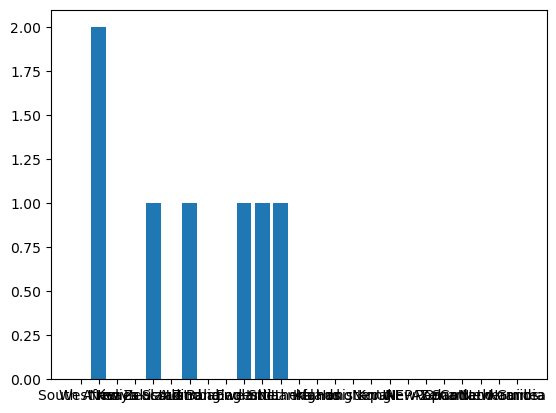

In [6]:
import matplotlib.pyplot as plt # this allows us to plot graphs

# convert the dictionary to corresponding lists to allow us to plot the bar chart.
names = list(all_Teams.keys()) 
values = list(all_Teams.values())

plt.bar(range(len(all_Teams)), values, tick_label=names)
plt.show()

This is objective 1 completed.

Objective 2 requires the identification of the best team. Teams consist of 11 players and most commonly the split it 6 batters and 5 bowlers. We are going to import the batters and bowlers history and rank the top 6 and top 5 batters respectively for each. Following this we will compare the teams and provide a rank. The first step is importing the data.

In [7]:
# importing the batting data
t20_World_Cup_Batting = pd.read_csv("t20.csv")
display(t20_World_Cup_Batting.head())

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71,NaN
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120,NaN
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113,NaN
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61,NaN
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91,NaN


In [8]:
# importing the bowling data
t20_World_Cup_Bowling = pd.read_csv("Bowling_t20.csv")
display(t20_World_Cup_Bowling.head())

,Unnamed: 0,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Unnamed: 14
0,0,SL Malinga (SL),2006-2019,79,79,284.5,1,2061,106,5/6,19.44,7.23,16.1,1,2,NaN
1,1,Shahid Afridi (ICC/PAK),2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0,NaN
2,2,Shakib Al Hasan (BDESH),2006-2019,76,75,277.5,2,1894,92,5/20,20.58,6.81,18.1,3,1,NaN
3,3,Saeed Ajmal (PAK),2009-2015,64,63,238.2,2,1516,85,4/19,17.83,6.36,16.8,4,0,NaN
4,4,Umar Gul (PAK),2007-2016,60,60,200.3,2,1443,85,5/6,16.97,7.19,14.1,4,2,NaN


The 2 cells above display the bowling and batting information of each team. It is clear the dataset is presented in order of total runs scored. Whilst average may seem the appropriate alternative, batters do not necessarily face the same amount of balls each game. Therefore strikerate takes into account this so we are going to reorder the dataframe through strike rate. Some player's span finished before 2019, we want to remove these players as they have retired from the game so will not be picked for the 2022 world cup.

In [9]:
# cleaning the data by removing empty information about a player's strike rate
for row in t20_World_Cup_Batting.itertuples():
    if '-' in row[11]:
        t20_World_Cup_Batting.drop(index = [row[0]], axis = 0, inplace=True)

t20_World_Cup_Batting['SR'] = pd.to_numeric(t20_World_Cup_Batting['SR']) # converting the strike rate from string to float
t20_World_Cup_Batting = t20_World_Cup_Batting.sort_values(by="SR", ascending = False) # ordering in terms of strike rate


t20_World_Cup_Batting['Retired'] = 'False' # initialising new series for every row that no one is retired
for row in t20_World_Cup_Batting.itertuples():
    x = row[3].split("-")
    if x[1] != '2019': # most up to date year to see if they're retired
        t20_World_Cup_Batting['Retired'] = t20_World_Cup_Batting['Retired'].replace('False', 'True')

display(t20_World_Cup_Batting.head())

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15,Retired
1582,32,Qasim Zia (BAH),2019-2019,3,1,1,4,4*,-,1,400.00,0,0,0,1,0,NaN,True
776,26,Mirza Ahsan (Aut),2019-2019,5,3,2,55,51*,55.0,18,305.55,0,1,0,2,7,NaN,True
1400,0,Mohammad Asif (PAK),2006-2010,11,3,3,9,5*,-,3,300.00,0,0,0,2,0,NaN,True
1157,7,Irfan Mir (Chile),2019-2019,4,3,2,19,18*,19.00,7,271.42,0,0,1,0,2,NaN,True
985,35,KRP Silva (USA),2019-2019,2,2,0,32,25,16.00,12,266.66,0,0,0,2,3,NaN,True


Now the batters are ranked in order we can use the exact same process for the bowlers. The only difference is a bowler is defined by their economy.

In [10]:
for row in t20_World_Cup_Bowling.itertuples():
    if '-' in row[11]:
        t20_World_Cup_Bowling.drop(index = [row[0]], axis = 0, inplace=True)

t20_World_Cup_Bowling['Econ'] = pd.to_numeric(t20_World_Cup_Bowling['Econ'])
t20_World_Cup_Bowling = t20_World_Cup_Bowling.sort_values(by="Econ", ascending = True)

t20_World_Cup_Bowling['Retired'] = 'False'
for row in t20_World_Cup_Bowling.itertuples():
    x = row[3].split("-")
    if x[1] != '2019':
        t20_World_Cup_Bowling['Retired'] = t20_World_Cup_Bowling['Retired'].replace('False', 'True')
        
display(t20_World_Cup_Bowling.head())

,Unnamed: 0,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Unnamed: 14,Retired
794,44,R Pisal (ROM),2019-2019,1,1,3.0,0,4,3,3/4,1.33,1.33,6.0,0,0,NaN,True
963,13,SR Welsh (CAN),2008-2008,1,1,3.0,0,6,2,2/6,3.0,2.00,9.0,0,0,NaN,True
961,11,AC Voges (AUS),2007-2013,7,1,2.0,0,5,2,2/5,2.5,2.50,6.0,0,0,NaN,True
858,8,GG Banner (Blz),2019-2019,3,1,3.3,0,10,2,2/10,5.0,2.85,10.5,0,0,NaN,True
778,28,Mansoor Amjad (PAK),2008-2008,1,1,1.0,0,3,3,3/3,1.0,3.00,2.0,0,0,NaN,True


Now we are going to find each team's best players, then rank the teams. We are creating a dictionary for each team in this world cup with 2 numerical values to keep track of the number of batters/bowlers and the cumulative value of their strike rate/economy respectively. To remove anomalous data we are going to set a minimum requirement of have played at least 10 games.

In [11]:
# initialising dictionary for batters
batting = {
    'AUS': [0,0],
    'PAK': [0,0],
    'SA': [0,0],
    'INDIA': [0,0],
    'ENG': [0,0],
    'SL': [0,0],
    'SCOT': [0,0],
    'NZ': [0,0],
    'WI': [0,0],
    'AFG': [0,0],
    'ZIM': [0,0],
    'IRE': [0,0],
    'NAM': [0,0],
    'BDESH': [0,0],
    'NL': [0,0],
    'UAE': [0,0]
}

for row in t20_World_Cup_Batting.itertuples():
    result = row[2][row[2].find('(')+1:row[2].find(')')] #splitting string to identify nationality of player
    if row[4] > 10: # making sure the player has played at least 10 games
        if result in batting.keys():
            if batting[result][1] < 6: # only have 6 batters in a team
                batting[result][0] = batting[result][0] + row[11] # cumulutive strike rate
                batting[result][1] = batting[result][1] + 1 # cumulutive number of batters

print(batting)

{'AUS': [915.07, 6], 'PAK': [1034.9299999999998, 6], 'SA': [849.15, 6], 'INDIA': [940.9000000000001, 6], 'ENG': [858.42, 6], 'SL': [822.65, 6], 'SCOT': [802.7300000000001, 6], 'NZ': [882.74, 6], 'WI': [855.4300000000001, 6], 'AFG': [914.23, 6], 'ZIM': [815.06, 6], 'IRE': [824.82, 6], 'NAM': [827.31, 6], 'BDESH': [792.0799999999999, 6], 'NL': [820.9100000000001, 6], 'UAE': [725.35, 6]}


Now we want to display this data to get a clear ranking.

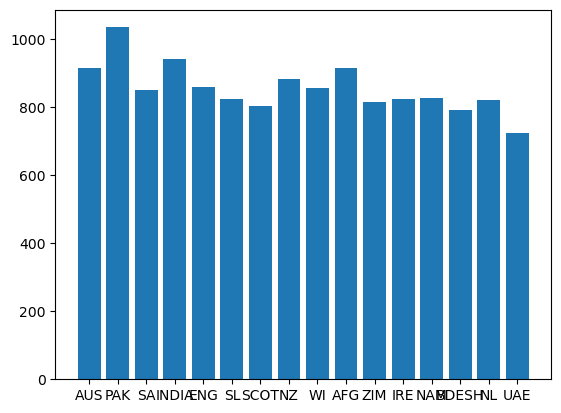

In [12]:
names = list(batting.keys())
values = list(batting.values())
new_Values = []
for item in values:
    new_Values.append(item[0])

plt.bar(range(len(batting)), new_Values, tick_label=names)
plt.show()

In [13]:
n = 0
sorted_Batting = sorted(batting.items(), key=lambda x:x[1])
for item in sorted_Batting:
    n = n + 1
    print(item[0] + ' ' + str(n))

UAE 1
BDESH 2
SCOT 3
ZIM 4
NL 5
SL 6
IRE 7
NAM 8
SA 9
WI 10
ENG 11
NZ 12
AFG 13
AUS 14
INDIA 15
PAK 16


In [14]:
bowling = {
    'AUS': [0,0],
    'PAK': [0,0],
    'SA': [0,0],
    'INDIA': [0,0],
    'ENG': [0,0],
    'SL': [0,0],
    'SCOT': [0,0],
    'NZ': [0,0],
    'WI': [0,0],
    'AFG': [0,0],
    'ZIM': [0,0],
    'IRE': [0,0],
    'NAM': [0,0],
    'BDESH': [0,0],
    'NL': [0,0],
    'UAE': [0,0]
}
for row in t20_World_Cup_Bowling.itertuples():
    result = row[2][row[2].find('(')+1:row[2].find(')')]
    if row[4] > 10:
        if result in bowling.keys():
            if bowling[result][1] < 5:
                bowling[result][0] = bowling[result][0] + row[12]
                bowling[result][1] = bowling[result][1] + 1

print(bowling)

{'AUS': [33.089999999999996, 5], 'PAK': [30.129999999999995, 5], 'SA': [32.72, 5], 'INDIA': [33.28, 5], 'ENG': [34.49, 5], 'SL': [30.549999999999997, 5], 'SCOT': [33.72, 5], 'NZ': [33.09, 5], 'WI': [31.8, 5], 'AFG': [31.22, 5], 'ZIM': [29.93, 5], 'IRE': [29.659999999999997, 5], 'NAM': [28.230000000000004, 5], 'BDESH': [34.129999999999995, 5], 'NL': [31.67, 5], 'UAE': [31.9, 5]}


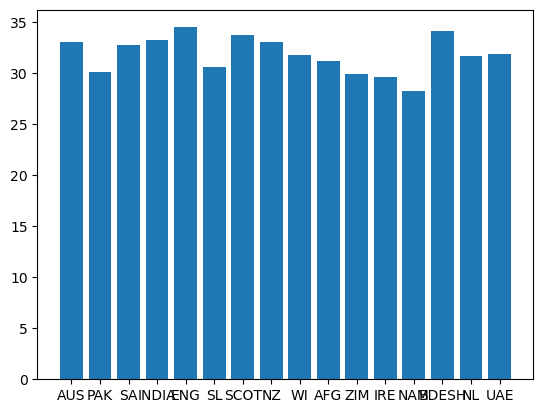

In [15]:
names = list(bowling.keys())
values = list(bowling.values())
new_Values = []
for item in values:
    new_Values.append(item[0])

plt.bar(range(len(bowling)), new_Values, tick_label=names)
plt.show()

In [16]:
n = 17
sorted_Bowling = sorted(bowling.items(), key=lambda x:x[1])
for item in sorted_Bowling:
    n = n - 1
    print(item[0] + ' ' + str(n))

NAM 16
IRE 15
ZIM 14
PAK 13
SL 12
AFG 11
NL 10
WI 9
UAE 8
SA 7
AUS 6
NZ 5
INDIA 4
SCOT 3
BDESH 2
ENG 1


Objective 2 complete, now objective 3. We want to retrieve all the head-to-head data and return pie charts displaying the probability of each team winning a game against their respective opponents.

In [17]:
country_List = ['Australia','England','Pakistan','India','Scotland','Afghanistan','Zimbabwe','Ireland','Namibia','Bangladesh','Sri Lanka', 'South Africa', 'New Zealand', 'United Arab Emirates']
t20_Series_Results = pd.read_csv("t20_series.csv")
display(t20_Series_Results.head())

,series,season,winner,margin,series_id
0,Twenty20 Cup,2003,Surrey,NaN,124121
1,Standard Bank Pro20 Series (in South Africa),2003/04,Eagles,NaN,134226
2,Twenty20 Cup (in England),2004,Leics,NaN,134471
3,Twenty-20 Tournament (in Sri Lanka),2004,Chilaw,NaN,304926
4,Australia in New Zealand T20I Match,2004/05,Australia,1-0 (1),238218


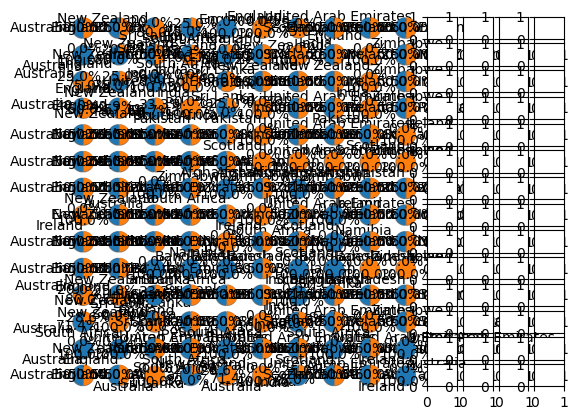

In [18]:
Australia = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

England = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

Pakistan = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

India = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

Scotland = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

Afghanistan = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

Zimbabwe = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

Ireland = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

Namibia = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

Bangladesh = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

Sri_Lanka = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

South_Africa = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

New_Zealand = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

United_Arab_Emirates = {
    'Australia': 0,
    'England': 0,
    'Pakistan': 0,
    'India': 0,
    'Scotland': 0,
    'Afghanistan': 0,
    'Zimbabwe': 0,
    'Ireland': 0,
    'Namibia': 0,
    'Bangladesh': 0,
    'Sri Lanka': 0, 
    'South Africa': 0, 
    'New Zealand': 0, 
    'United Arab Emirates': 0
}

country_Dictionary_List = [Australia,England,Pakistan,India,Scotland,Afghanistan,Zimbabwe,Ireland,Namibia,Bangladesh,Sri_Lanka,South_Africa, New_Zealand, United_Arab_Emirates]


scores = []
for row in t20_Series_Results.itertuples():
    for item in country_List:
        if row[3] == item:
            for new_item in country_List:
                if new_item in row[1]:
                    if new_item != item:
                        item = item.replace(" ", "_" )
                        eval(item)[new_item] += 1


def all_Results(dict1,dict2,str1,str2,plot_Number):
    sizes = Australia['England'], England['Australia']
    labels = 'Australia', 'England'
    explode = (0.1, 0)
    ax1[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1[0].axis('equal')
                                            
                        
sizes = Australia['England'], England['Australia']
labels = 'Australia', 'England'
explode = (0.1, 0)
fig1, ax1 = plt.subplots(14,14)
ax1[0,0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1[0,0].axis('equal')

def head_To_Head(dict1,dict2,str1,str2,plot_Number,plot_Number2):
    if (dict1[str2] + dict2[str1]) != 0:
        sizes = dict1[str2], dict2[str1]
        labels = str1, str2
        explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
        ax1[plot_Number,plot_Number2].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        ax1[plot_Number,plot_Number2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    else:
        sizes = 1, 1
        labels = str1, str2
        explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
        ax1[plot_Number,plot_Number2].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        ax1[plot_Number,plot_Number2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


head_To_Head(Australia,New_Zealand,'Australia','New Zealand',1,0)
head_To_Head(Australia,India,'Australia','India',2,0)
head_To_Head(Australia,Pakistan,'Australia','Pakistan',3,0)
head_To_Head(Australia,Scotland,'Australia','Scotland',4,0)
head_To_Head(Australia,Afghanistan,'Australia','Afghanistan',5,0)
head_To_Head(Australia,Zimbabwe,'Australia','Zimbabwe',6,0)
head_To_Head(Australia,Ireland,'Australia','Ireland',7,0)
head_To_Head(Australia,Namibia,'Australia','Namibia',8,0)
head_To_Head(Australia,Bangladesh,'Australia','Bangladesh',9,0)
head_To_Head(Australia,Sri_Lanka,'Australia','Sri Lanka',10,0)
head_To_Head(Australia,South_Africa,'Australia','South Africa',11,0)
head_To_Head(Australia,United_Arab_Emirates,'Australia','United Arab Emirates',12,0)
head_To_Head(Australia,Australia,'Australia','Australia',13,0)

head_To_Head(England,England,'England','England',0,1)
head_To_Head(England,New_Zealand,'England','New Zealand',1,1)
head_To_Head(England,India,'England','India',2,1)
head_To_Head(England,Pakistan,'England','Pakistan',3,1)
head_To_Head(England,Scotland,'England','Scotland',4,1)
head_To_Head(England,Afghanistan,'England','Afghanistan',5,1)
head_To_Head(England,Zimbabwe,'England','Zimbabwe',6,1)
head_To_Head(England,Ireland,'England','Ireland',7,1)
head_To_Head(England,Namibia,'England','Namibia',8,1)
head_To_Head(England,Bangladesh,'England','Bangladesh',9,1)
head_To_Head(England,Sri_Lanka,'England','Sri Lanka',10,1)
head_To_Head(England,South_Africa,'England','South Africa',11,1)
head_To_Head(England,United_Arab_Emirates,'England','United Arab Emirates',12,1)
head_To_Head(England,Australia,'England','Australia',13,1)

head_To_Head(New_Zealand,England,'New Zealand','England',0,2)
head_To_Head(New_Zealand,New_Zealand,'New Zealand','New Zealand',1,2)
head_To_Head(New_Zealand,India,'New Zealand','India',2,2)
head_To_Head(New_Zealand,Pakistan,'New Zealand','Pakistan',3,2)
head_To_Head(New_Zealand,Scotland,'New Zealand','Scotland',4,2)
head_To_Head(New_Zealand,Afghanistan,'New Zealand','Afghanistan',5,2)
head_To_Head(New_Zealand,Zimbabwe,'New Zealand','Zimbabwe',6,2)
head_To_Head(New_Zealand,Ireland,'New Zealand','Ireland',7,2)
head_To_Head(New_Zealand,Namibia,'New Zealand','Namibia',8,2)
head_To_Head(New_Zealand,Bangladesh,'New Zealand','Bangladesh',9,2)
head_To_Head(New_Zealand,Sri_Lanka,'New Zealand','Sri Lanka',10,2)
head_To_Head(New_Zealand,South_Africa,'New Zealand','South Africa',11,2)
head_To_Head(New_Zealand,United_Arab_Emirates,'New Zealand','United Arab Emirates',12,2)
head_To_Head(New_Zealand,Australia,'New Zealand','Australia',13,2)

head_To_Head(Sri_Lanka,England,'Sri Lanka','England',0,3)
head_To_Head(Sri_Lanka,New_Zealand,'Sri Lanka','New Zealand',1,3)
head_To_Head(Sri_Lanka,India,'Sri Lanka','India',2,3)
head_To_Head(Sri_Lanka,Pakistan,'Sri Lanka','Pakistan',3,3)
head_To_Head(Sri_Lanka,Scotland,'Sri Lanka','Scotland',4,3)
head_To_Head(Sri_Lanka,Afghanistan,'Sri Lanka','Afghanistan',5,3)
head_To_Head(Sri_Lanka,Zimbabwe,'Sri Lanka','Zimbabwe',6,3)
head_To_Head(Sri_Lanka,Ireland,'Sri Lanka','Ireland',7,3)
head_To_Head(Sri_Lanka,Namibia,'Sri Lanka','Namibia',8,3)
head_To_Head(Sri_Lanka,Bangladesh,'Sri Lanka','Bangladesh',9,3)
head_To_Head(Sri_Lanka,Sri_Lanka,'Sri Lanka','Sri Lanka',10,3)
head_To_Head(Sri_Lanka,South_Africa,'Sri Lanka','South Africa',11,3)
head_To_Head(Sri_Lanka,United_Arab_Emirates,'Sri Lanka','United Arab Emirates',12,3)
head_To_Head(Sri_Lanka,Australia,'Sri Lanka','Australia',13,3)

head_To_Head(South_Africa,England,'South Africa','England',0,4)
head_To_Head(South_Africa,New_Zealand,'South Africa','New Zealand',1,4)
head_To_Head(South_Africa,India,'South Africa','India',2,4)
head_To_Head(South_Africa,Pakistan,'South Africa','Pakistan',3,4)
head_To_Head(South_Africa,Scotland,'South Africa','Scotland',4,4)
head_To_Head(South_Africa,Afghanistan,'South Africa','Afghanistan',5,4)
head_To_Head(South_Africa,Zimbabwe,'South Africa','Zimbabwe',6,4)
head_To_Head(South_Africa,Ireland,'South Africa','Ireland',7,4)
head_To_Head(South_Africa,Namibia,'South Africa','Namibia',8,4)
head_To_Head(South_Africa,Bangladesh,'South Africa','Bangladesh',9,4)
head_To_Head(South_Africa,Sri_Lanka,'South Africa','Sri Lanka' ,10,4)
head_To_Head(South_Africa,South_Africa,'South Africa','South Africa',11,4)
head_To_Head(South_Africa,United_Arab_Emirates,'South Africa','United Arab Emirates',12,4)
head_To_Head(South_Africa,Australia,'South Africa','Australia',13,4)

head_To_Head(United_Arab_Emirates,England,'United Arab Emirates','England',0,5)
head_To_Head(United_Arab_Emirates,New_Zealand,'United Arab Emirates','New Zealand',1,5)
head_To_Head(United_Arab_Emirates,India,'United Arab Emirates','India',2,5)
head_To_Head(United_Arab_Emirates,Pakistan,'United Arab Emirates','Pakistan',3,5)
head_To_Head(United_Arab_Emirates,Scotland,'United Arab Emirates','Scotland',4,5)
head_To_Head(United_Arab_Emirates,Afghanistan,'United Arab Emirates','Afghanistan',5,5)
head_To_Head(United_Arab_Emirates,Zimbabwe,'United Arab Emirates','Zimbabwe',6,5)
head_To_Head(United_Arab_Emirates,Ireland,'United Arab Emirates','Ireland',7,5)
head_To_Head(United_Arab_Emirates,Namibia,'United Arab Emirates','Namibia',8,5)
head_To_Head(United_Arab_Emirates,Bangladesh,'United Arab Emirates','Bangladesh',9,5)
head_To_Head(United_Arab_Emirates,Sri_Lanka,'United Arab Emirates','Sri Lanka' ,10,5)
head_To_Head(United_Arab_Emirates,South_Africa ,'United Arab Emirates','South Africa',11,5)
head_To_Head(United_Arab_Emirates,United_Arab_Emirates,'United Arab Emirates','United Arab Emirates',12,5)
head_To_Head(United_Arab_Emirates,Australia,'United Arab Emirates','Australia',13,5)

head_To_Head(India,England,'India','England',0,6)
head_To_Head(India,New_Zealand,'India','New Zealand',1,6)
head_To_Head(India,India,'India','India',2,6)
head_To_Head(India,Pakistan,'India','Pakistan',3,6)
head_To_Head(India,Scotland,'India','Scotland',4,6)
head_To_Head(India,Afghanistan,'India','Afghanistan',5,6)
head_To_Head(India,Zimbabwe,'India','Zimbabwe',6,6)
head_To_Head(India,Ireland,'India','Ireland',7,6)
head_To_Head(India,Namibia,'India','Namibia',8,6)
head_To_Head(India,Bangladesh,'India','Bangladesh',9,6)
head_To_Head(India,Sri_Lanka,'India','Sri Lanka' ,10,6)
head_To_Head(India,South_Africa ,'India','South Africa',11,6)
head_To_Head(India,United_Arab_Emirates,'India','United Arab Emirates',12,6)
head_To_Head(India,Australia,'India','Australia',13,6)

head_To_Head(Scotland,England,'Scotland','England',0,7)
head_To_Head(Scotland,New_Zealand,'Scotland','New Zealand',1,7)
head_To_Head(Scotland,India,'Scotland','India',2,7)
head_To_Head(Scotland,Pakistan,'Scotland','Pakistan',3,7)
head_To_Head(Scotland,Scotland,'Scotland','Scotland',4,7)
head_To_Head(Scotland,Afghanistan,'Scotland','Afghanistan',5,7)
head_To_Head(Scotland,Zimbabwe,'Scotland','Zimbabwe',6,7)
head_To_Head(Scotland,Ireland,'Scotland','Ireland',7,7)
head_To_Head(Scotland,Namibia,'Scotland','Namibia',8,7)
head_To_Head(Scotland,Bangladesh,'Scotland','Bangladesh',9,7)
head_To_Head(Scotland,Sri_Lanka,'Scotland','Sri Lanka' ,10,7)
head_To_Head(Scotland,South_Africa ,'Scotland','South Africa',11,7)
head_To_Head(Scotland,United_Arab_Emirates,'Scotland','United Arab Emirates',12,7)
head_To_Head(Scotland,Australia,'Scotland','Australia',13,7)

head_To_Head(Zimbabwe,England,'Zimbabwe','England',0,8)
head_To_Head(Zimbabwe,New_Zealand,'Zimbabwe','New Zealand',1,8)
head_To_Head(Zimbabwe,India,'Zimbabwe','India',2,8)
head_To_Head(Zimbabwe,Pakistan,'Zimbabwe','Pakistan',3,8)
head_To_Head(Zimbabwe,Scotland,'Zimbabwe','Scotland',4,8)
head_To_Head(Zimbabwe,Afghanistan,'Zimbabwe','Afghanistan',5,8)
head_To_Head(Zimbabwe,Zimbabwe,'Zimbabwe','Zimbabwe',6,8)
head_To_Head(Zimbabwe,Ireland,'Zimbabwe','Ireland',7,8)
head_To_Head(Zimbabwe,Namibia,'Zimbabwe','Namibia',8,8)
head_To_Head(Zimbabwe,Bangladesh,'Zimbabwe','Bangladesh',9,8)
head_To_Head(Zimbabwe,Sri_Lanka,'Zimbabwe','Sri Lanka' ,10,8)
head_To_Head(Zimbabwe,South_Africa ,'Zimbabwe','South Africa',11,8)
head_To_Head(Zimbabwe,United_Arab_Emirates,'Zimbabwe','United Arab Emirates',12,8)
head_To_Head(Zimbabwe,Australia,'Zimbabwe','Australia',13,8)

head_To_Head(Ireland,England,'Ireland','England',0,9)
head_To_Head(Ireland,New_Zealand,'Ireland','New Zealand',1,9)
head_To_Head(Ireland,India,'Ireland','India',2,9)
head_To_Head(Ireland,Pakistan,'Ireland','Pakistan',3,9)
head_To_Head(Ireland,Scotland,'Ireland','Scotland',4,9)
head_To_Head(Ireland,Afghanistan,'Ireland','Afghanistan',5,9)
head_To_Head(Ireland,Zimbabwe,'Ireland','Zimbabwe',6,9)
head_To_Head(Ireland,Ireland,'Ireland','Ireland',7,9)
head_To_Head(Ireland,Namibia,'Ireland','Namibia',8,9)
head_To_Head(Ireland,Bangladesh,'Ireland','Bangladesh',9,9)
head_To_Head(Ireland,Sri_Lanka,'Ireland','Sri Lanka' ,10,9)
head_To_Head(Ireland,South_Africa ,'Ireland','South Africa',11,9)
head_To_Head(Ireland,United_Arab_Emirates,'Ireland','United Arab Emirates',12,9)
head_To_Head(Ireland,Australia,'Ireland','Australia',13,9)


plt.show()

# Project Outcome (10 + 10 marks)

## Overview of Results


## Objective 1

### Explanation of Results

The results show that there are only a handful of teams that have won the world cup. West Indies winning the world cup twice, Pakistan, Australia, England, India and Sr Lanka have all won it once. Other than potentially the west Indies this shows there is no outright dominant team with 6 different winners across 7 tournaments. 

### Visualisation
The following bar chart gives a vivid representation the number of world cups each team has won.


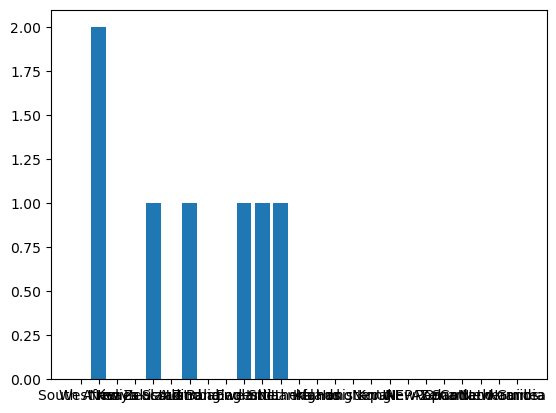

In [19]:
import matplotlib.pyplot as plt # this allows us to plot graphs

# convert the dictionary to corresponding lists to allow us to plot the bar chart.
names = list(all_Teams.keys()) 
values = list(all_Teams.values())
plt.bar(range(len(all_Teams)), values, tick_label=names)
plt.show()

## Objective 2
### Explanation of Results

A team is best with a high strike rate and low economy. The team with the highest strike rate is Pakistan by roughly just over 100. These are follow by India, Afghanistan and Australia with a similar strike rate. The bowling economy rate shows Namibia are the most efficient, followed by Ireland, Zimbabwe and Pakistan. Pakistan are the only team to make it into the the top 4 of both metrics so we can use this information to predict Pakistan have the best team

### Visualisation
The following bar charts show the cumulative strike rate for team's batting and the cumulative economy for team's bowling.

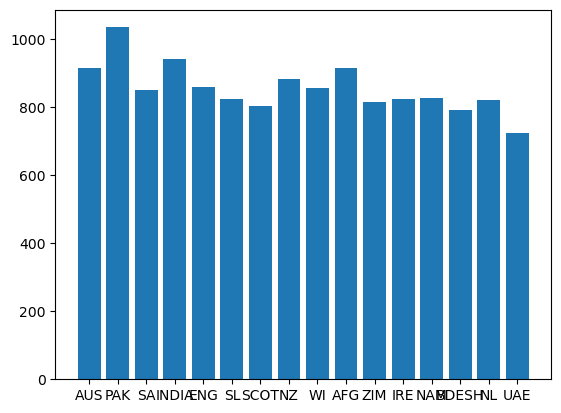

In [20]:
names = list(batting.keys())
values = list(batting.values())
new_Values = []
for item in values:
    new_Values.append(item[0])

plt.bar(range(len(batting)), new_Values, tick_label=names)
plt.show()

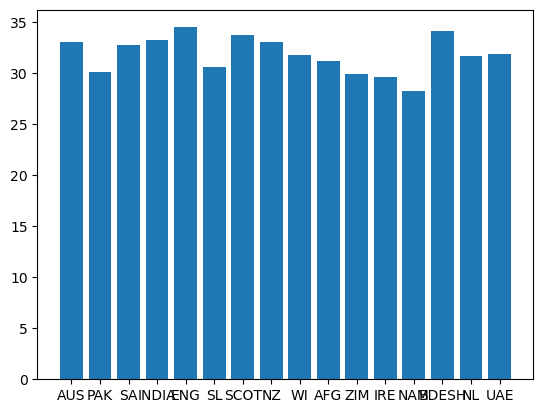

In [21]:
names = list(bowling.keys())
values = list(bowling.values())
new_Values = []
for item in values:
    new_Values.append(item[0])

plt.bar(range(len(bowling)), new_Values, tick_label=names)
plt.show()

## Objective 3
### Explanation of Results

Unfortunately objective 3 was incomplete. The information was retrieved and attempts to visualise this data had begun but was not completed nor cleaned. We therefore cannot use this information to make our prediction for the world cup winners.

# Conclusion (5 marks)


### Acheivements
In conclusion based on the data collected and analysed, Pakistan are the most likely team to win the world cup. This is based on the fact they have already won one world cup so know what winning feels like and they have the best team based on the metrics which mean a team is good from a bowling and batting perspective.

### Limitations

There are several limitations to this study:
1. There was no analysis of general world cup performance, only world cup victories. For example Pakistan may have won one world cup but finished bottom of their group in every other world cup.
2. Batting and bowling approaches are not consistent during a game, for example batters are more likely to be aggressive and score more runs towards the end of the game, so you might put your better bowlers at the end of a game, which sacrifices their own economy.
3. Already mentioned but the 'optimal' batting and bowling team makes many assumptions. Firstly that everyone who played at the 2019 world cup still plays now. Secondly that there are no injuries or reasons why a player who would be available isn't available.
4. Whilst the objective was not finished, data on the series head to head is limited for some teams, so an assumption was made that if two teams haven't faced each other there is an equal probability of victory for each team. However it is more likely a team such as Australia would defeat a team such as Scotland.

### Future Work

Future work would include several ideas mentioned in the limitations section:
1. To finish objective 3 and accurately assess the likelihood of each team winning each game in the tournament.
2. To provide a ranking metric for overall performance at the world cups, to give a better indication rather than a binary win or loss situation.

However there are new ideas that can help build a more accurate model:
1. Different venues have different conditions, for example the 2022 t20 world cup is based in Australia, which gives Australia an advantage in one domain. So to find out which other teams would benefit from this.